<a href="https://colab.research.google.com/github/chimeyrock999/BookStoreWeb/blob/master/nlp/WordEmbedding/WordEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/CMC/NLP

/content/drive/MyDrive/CMC/NLP


In [ ]:
import json

In [ ]:
data =[]
for line in open("Tokenization/Sarcasm_Headlines_Dataset.json", 'r'):
  data.append(json.loads(line))

In [ ]:
data

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [ ]:
sentences =[]
for item in data:
  sentences.append(item['headline'])

In [ ]:
sentences

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages",
 'airline passengers tackle man who rushes cockpit in bomb threat',
 'facebook reportedly working on healthcare features and apps',
 "north korea praises trump and urges us voters to reject 'dull hillary'",
 "actually, cnn's jeffrey lord has been 'indefensible' for a while",
 'barcelona holds huge protest in su

In [ ]:
label=[]
for item in data:
  label.append(item['is_sarcastic'])

In [ ]:
label=np.array(label)

In [ ]:
label

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
tokenizer=Tokenizer(num_words=vocab_size, oov_token='<OOV>')

In [ ]:
tokenizer.fit_on_texts(sentences)

In [ ]:
word_index=tokenizer.word_index

In [ ]:
vocab_size=len(word_index)+1

In [ ]:
sequences=tokenizer.texts_to_sequences(sentences)

In [ ]:
sequences

[[308, 15115, 679, 3337, 2298, 48, 382, 2576, 15116, 6, 2577, 8434],
 [4, 8435, 3338, 2746, 22, 2, 166, 8436, 416, 3112, 6, 258, 9, 1002],
 [145, 838, 2, 907, 1749, 2093, 582, 4719, 221, 143, 39, 46, 2, 10736],
 [1485, 36, 224, 400, 2, 1832, 29, 319, 22, 10, 2924, 1393, 6969, 968],
 [767, 719, 4720, 908, 10737, 623, 594, 5, 4, 95, 1309, 92],
 [10738, 4, 365, 73],
 [4, 6970, 351, 6, 461, 4274, 2195, 1486],
 [19, 479, 39, 1168, 31, 155, 2, 99, 83, 18, 158, 6, 32, 352],
 [249, 3623, 6971, 555, 5274, 1995, 141],
 [2094, 326, 347, 401, 60, 15117, 6, 4, 3896],
 [2925, 1680, 4721, 14, 37, 4275, 6972, 5, 2095, 1103],
 [286, 782, 462, 8, 1556, 1911, 9, 3624],
 [234, 514, 2926, 13, 9, 929, 226, 369, 2, 4276, 15118, 8437],
 [238, 3897, 8438, 3339, 38, 235, 15119, 6, 7, 173],
 [15120, 1394, 665, 651, 5, 327, 3, 1031],
 [534, 2095, 10739, 123, 10740, 6, 10741, 4722, 1912],
 [2578,
  1395,
  383,
  45,
  3898,
  348,
  319,
  1032,
  2,
  24,
  15121,
  20,
  1104,
  387,
  103,
  1310],
 [1681, 843

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
padded_sequences=pad_sequences(sequences, padding="post")

In [ ]:
max_length=padded_sequences.shape[1]

In [ ]:
max_length

40

In [ ]:
padded_sequences=np.array(padded_sequences)

In [ ]:
padded_sequences, label = shuffle(padded_sequences, label, random_state=0)

In [ ]:
train_sequences, test_sequences, train_label, test_label = train_test_split(padded_sequences, label, test_size=0.2, random_state=0)

In [ ]:
train_sequences

array([[ 110,    5, 2614, ...,    0,    0,    0],
       [ 480, 1541,  856, ...,    0,    0,    0],
       [  50,   53,  493, ...,    0,    0,    0],
       ...,
       [8042,  145, 5151, ...,    0,    0,    0],
       [ 636, 2861, 8034, ...,    0,    0,    0],
       [  43,   41,    5, ...,    0,    0,    0]], dtype=int32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
embedding_dims=64

In [ ]:
model.add(Embedding(vocab_size, embedding_dims, input_length=max_length))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(10, activation='relu'))

In [ ]:
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 40, 64)            1898112   
_________________________________________________________________
flatten_3 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                25610     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 1,923,733
Trainable params: 1,923,733
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_sequences, train_label, epochs=10, validation_data=(test_sequences, test_label))

Epoch 1/10
668/668 [==============================] - 6s 8ms/step - loss: 0.4155 - acc: 0.7940 - val_loss: 0.2936 - val_acc: 0.8742
Epoch 2/10
668/668 [==============================] - 5s 7ms/step - loss: 0.1301 - acc: 0.9554 - val_loss: 0.3104 - val_acc: 0.8742
Epoch 3/10
668/668 [==============================] - 5s 7ms/step - loss: 0.0256 - acc: 0.9947 - val_loss: 0.3675 - val_acc: 0.8738
Epoch 4/10
668/668 [==============================] - 5s 8ms/step - loss: 0.0048 - acc: 0.9995 - val_loss: 0.4123 - val_acc: 0.8699
Epoch 5/10
668/668 [==============================] - 5s 8ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4419 - val_acc: 0.8703
Epoch 6/10
668/668 [==============================] - 5s 8ms/step - loss: 7.5579e-04 - acc: 1.0000 - val_loss: 0.4698 - val_acc: 0.8697
Epoch 7/10
668/668 [==============================] - 5s 7ms/step - loss: 3.2252e-04 - acc: 1.0000 - val_loss: 0.4920 - val_acc: 0.8703
Epoch 8/10
668/668 [==============================] - 5s 8ms/step - 

In [ ]:
test_sen = ['coed rec softball team having trouble finding enough hyper-competitive men to ruin experience',
            'brutalist beaver constructs paul rudolph-inspired dam',
            'israel passes law cementing itself as exclusive nation-state of benjamin netanyahu',
            'onion social cracks down on sexual harassment by banning all women from platform', 
            'mom announces plans to get out some of your old baby stuff and quietly stare at it', 
            'jay inslee smashes through wall of town hall in solar-powered mech suit to announce climate change plan', 
            'trump regrets choosing kavanaugh after supreme court nominee keeps talking about how much he respects women', 
            "exasperated huckabee sanders reminds press corps that children under 14 can't feel pain",
            'minotaur wondering if there more to life than bashing in heads of those who dare wander into labyrinth',
            "annoyed movers weren't expecting client to have belongings",
            'argentina tightens security in anticipation of numerous criminals arriving for g20',
            "huckabee sanders tells colleagues she's taking temporary post as google ceo before transitioning into full-time role as sultan of brunei",
            "new iowa poll finds majority of democrats would vote for candidate named 'bobby cheeseburger'", 
            "there no way tv character could actually afford big 'new york city' coffee mug",
            'dave matthews band apologizes after tour bus dumps another 800 pounds of human shit onto same boat full of people',
            "lester holt begins debate by reiterating he doesn't know who these fucking people are",
            "paramedics didn't realize how hard it would be to cut drunk woman out of elmo costume", 
            'signs make upcoming section of road sound pretty badass', 
            'Countries in Asia are placing orders for a new drug to treat coronavirus. Poorer nations could miss out again',
            'audio experts confirm whiny, irritating noises in secret recording devin nunes', 
            'penny not so lucky for tortured soul of lincoln trapped inside',
            "wedding experts say engagement ring should cost at least three diamond miners' lives", 
            'experts caution new car loses 90% of value as soon as you drive it off cliff', 
            'woman starting to worry she just has type of face where makeup looks insane', 
            'woman under impression she being discreet about fishing stray hair out of bra', 
            "New trailer for 'The Batman' shows a gritty Gotham featuring several familiar foes",
            "defiant evangelicals branch off into new 'first molestist' sub-denomination", 
            'caterpillar in pupal stage for past 3 months going to be pissed if it turns out to be moth',
            'inconsolable sarah palin opens up about sacha baron cohen betrayal to cardboard cutout of whoopi goldberg',
            'Poetry is experiencing a new golden age, with young writers of color taking the lead',
            'rolos unveils new cryptocurrency exclusively for rolos customers', 
            'candidate with no chance of winning nomination settles on goal of crushing hickenlooper campaign',
            'ice argues migrants in camps are free to die at any time',
            'Americans among more than 350 passengers who departed Kabul on evacuation flight Sunday',   ]
test_seq = tokenizer.texts_to_sequences(test_sen)
padded_test_seq = pad_sequences(test_seq, maxlen=max_length, truncating='post', padding='post')

In [ ]:
padded_test_seq

array([[    1, 17864,  9195, ...,     0,     0,     0],
       [    1, 15565, 12828, ...,     0,     0,     0],
       [  895,  1120,   292, ...,     0,     0,     0],
       ...,
       [  458,    10,    62, ...,     0,     0,     0],
       [  612,  8375,  2622, ...,     0,     0,     0],
       [   91,  1151,    40, ...,     0,     0,     0]], dtype=int32)

In [ ]:
predict=model.predict(padded_test_seq)

In [ ]:
result=[]
for item in predict:
  if (item>=0.5):
    result.append(1)
  else:
    result.append(0)
result=np.array(result)

In [ ]:
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
e=model.layers[0]

In [ ]:
weights=e.get_weights()[0]

In [ ]:
weights

array([[-0.10391529,  0.09582087,  0.08930604, ..., -0.05645703,
         0.04292269,  0.06973216],
       [-0.00601778, -0.01804117, -0.02787898, ..., -0.03007177,
         0.02434022, -0.03737517],
       [-0.07715533, -0.00164047, -0.02815096, ...,  0.09193815,
        -0.03418083, -0.00802972],
       ...,
       [ 0.06280194,  0.04740711,  0.04209881, ...,  0.03103068,
        -0.03295979,  0.00266393],
       [ 0.01162055, -0.07086789,  0.039521  , ...,  0.04231635,
        -0.02889764,  0.04524703],
       [ 0.00653076, -0.0333126 ,  0.07315794, ..., -0.01430865,
         0.02788573, -0.0025229 ]], dtype=float32)

In [ ]:
weights.shape

(29658, 64)

In [ ]:
import csv

In [ ]:
with open('WordEmbedding/embedding.csv', mode='w') as f:
  header =['word', 'vector']
  word_writer = csv.writer(f)
  word_writer.writerow(header)
  for index in range(1, vocab_size):
    line=[tokenizer.index_word[index], weights[index]]
    word_writer.writerow(line)

In [ ]:
import io

out_v=io.open("WordEmbedding/vecs.tsv", 'w', encoding='utf-8')
out_m=io.open("WordEmbedding/meta.tsv", 'w', encoding='utf-8')
for index in range(1, vocab_size):
  word=tokenizer.index_word[index]
  vector=weights[index]
  out_m.write(word+'\n')
  out_v.write('\t'.join([str(x) for x in vector]) +'\n')

out_m.close()
out_v.close()

Visualizaion of Embedding at https://projector.tensorflow.org/
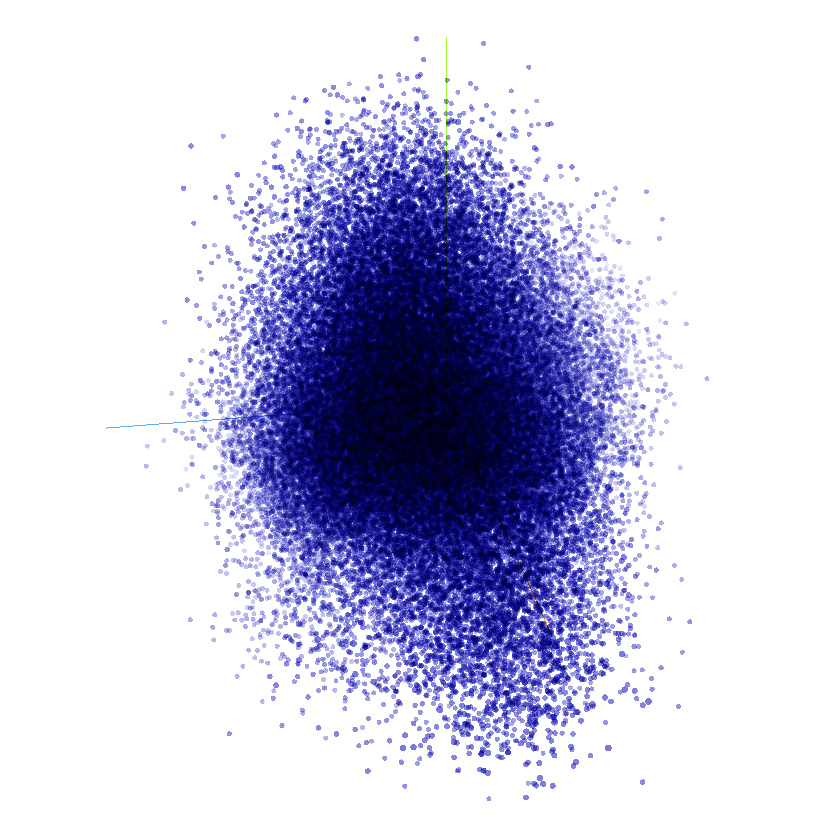

Những từ có độ tương đồng cao với "proton":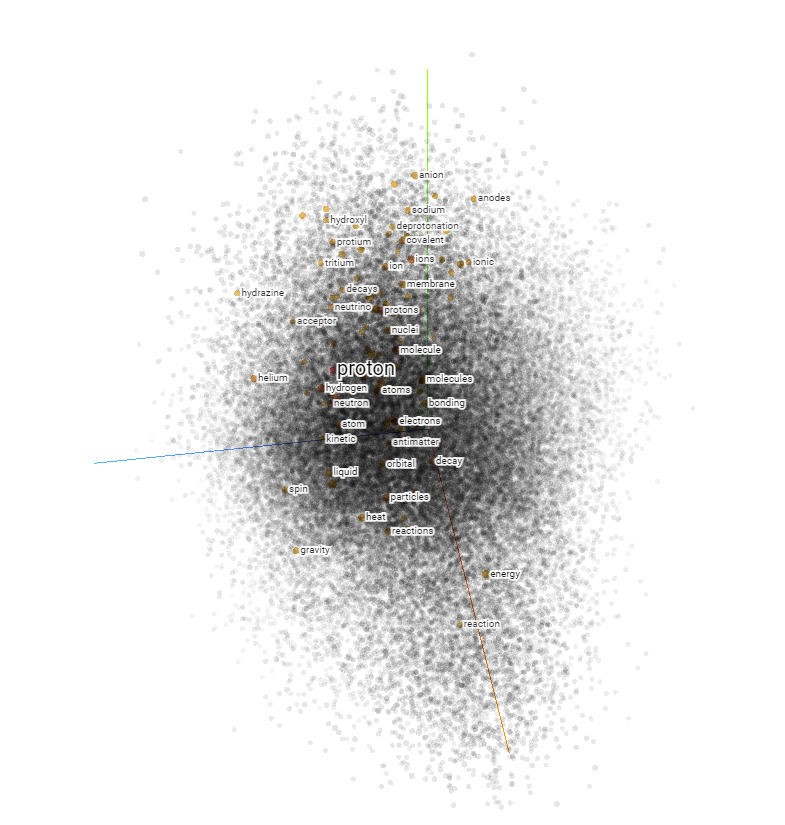